<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_20/TidyTuesday_Broadband_Internet_Access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Data Cleaning

In [2]:
# Data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-11/broadband.csv')

# Clean name function
def column_cleaner(x):

  clean_name = (x.
   lower().
   replace(' ', '_'))
  
  return clean_name

# Clean names  
df.columns = [column_cleaner(x) for x in df.columns]

# Some non-numeric types in this column. Convert
df['broadband_availability_per_fcc'] = pd.to_numeric(df['broadband_availability_per_fcc'], errors = 'coerce')

# Inspect
df.head()

,st,county_id,county_name,broadband_availability_per_fcc,broadband_usage
0,AL,1001,Autauga County,0.81,0.28
1,AL,1003,Baldwin County,0.88,0.30
2,AL,1005,Barbour County,0.59,0.18
3,AL,1007,Bibb County,0.29,0.07
4,AL,1009,Blount County,0.69,0.09


Group states into regions as defined by US Census.

In [3]:
west_ids = ['WA', 'OR', 'CA', 'MT',
            'ID', 'WY', 'NV', 'UT',
            'CO', 'AZ', 'NM']

midwest_ids = ['ND', 'MN', 'SD', 'IA',
               'NE', 'KS', 'MD', 'IL',
               'WI', 'MI', 'IN', 'OH']

northeast_ids = ['PA', 'NY', 'VT', 'NH',
                 'ME', 'MA', 'CT', 'RI',
                 'NJ']

south_ids = ['TX', 'OK', 'AR', 'LA',
             'MS', 'TN', 'KY', 'AL',
             'FL', 'GA', 'SC', 'NC',
             'MD', 'DE', 'DC', 'WV',
             'VA']

# Function to place state in region
def us_census_regions(x):

  if x in west_ids:
     return'West'
  elif x in midwest_ids:
    return 'Midwest'
  elif x in northeast_ids:
    return 'Northeast'
  elif x in south_ids:
    return 'South'

# Apply above function
df['region'] = df['st'].apply(us_census_regions)

# Inspect
df.head()

,st,county_id,county_name,broadband_availability_per_fcc,broadband_usage,region
0,AL,1001,Autauga County,0.81,0.28,South
1,AL,1003,Baldwin County,0.88,0.30,South
2,AL,1005,Barbour County,0.59,0.18,South
3,AL,1007,Bibb County,0.29,0.07,South
4,AL,1009,Blount County,0.69,0.09,South


# Plotting

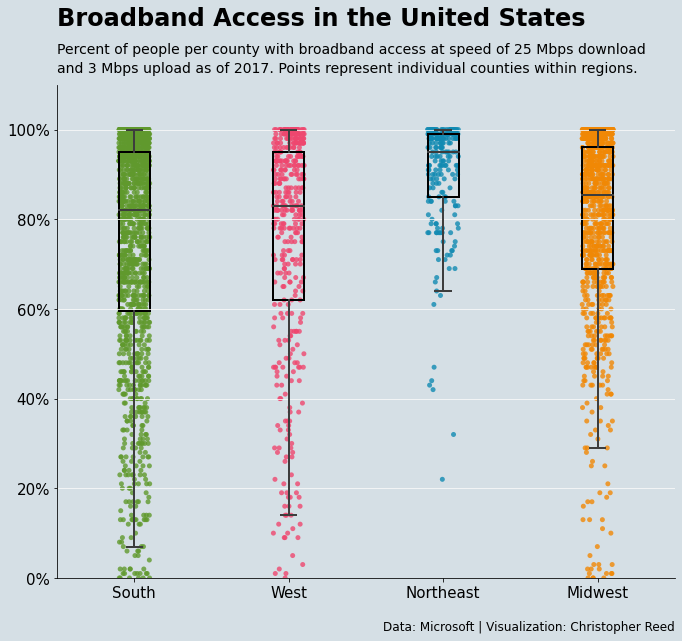

In [5]:
# Color palette
palette = {'West':'#EF476F',
           'Midwest':'#F18805',
           'Northeast':'#118AB2',
           'South':'#60992D'}

# Create figure
fig, ax = plt.subplots(figsize = (10, 9))


################
## MAIN PLOTS ##
################

# Cool boxplot props dict you can use for advanced controls
box_props = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    # 'medianprops':{'lw':'2'},
    # 'whiskerprops':{'lw':'2'},
    # 'capprops':{'lw':'2'}
}

# Strip plot and box plot
sns.stripplot(x = 'region',
              y = 'broadband_availability_per_fcc',
              alpha = 0.8,
              palette = palette,
              data = df,
              ax = ax,
              zorder = 0)
sns.boxplot(x = 'region',
            y = 'broadband_availability_per_fcc',
            data = df,
            showfliers = False,
            width = 0.2,
            linewidth = 2,
            zorder = 3,
            **box_props,
            ax = ax)

#######################
## TITLES AND LABELS ##
#######################

# Main title
ax.text(x = 0, y = 1.12,
        s = 'Broadband Access in the United States',
        transform = ax.transAxes,
        ha = 'left',
        fontsize = 24,
        weight = 'bold',
        color = 'black')

# Sub title
ax.text(x = 0, y = 1.025,
        s = "Percent of people per county with broadband access at speed of 25 Mbps download\nand 3 Mbps upload as of 2017. Points represent individual counties within regions.",
        transform = ax.transAxes,
        ha = 'left',
        fontsize = 14,
        linespacing = 1.5,
        color = 'black')

# Axis labels
ax.set_ylabel('')
ax.set_xlabel('')

# Credits
ax.text(x = 1, y = -0.1,
        s = 'Data: Microsoft | Visualization: Christopher Reed',
        transform = ax.transAxes,
        fontsize = 12,
        ha = 'right',
        va = 'center')

###########################
## TICKS AND AXIS TWEAKS ##
###########################

ax.tick_params(axis = 'both',
               labelsize = 15,
               labelcolor = 'black')

ax.set_ylim(bottom = 0,
            top = 1.1)

# Y-axis as percent
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

##########
## GRID ##
##########

ax.grid(axis = 'y',
        color = '#fafafa')

###########
## EXTRA ##
###########

# Colors
ax.set_facecolor('#D5DFE5')
fig.set_facecolor('#D5DFE5')

# Despine
ax = sns.despine()

# Tight
plt.tight_layout()

# Save
plt.savefig('Broadband Internet Access.jpg', facecolor = '#D5DFE5', bbox_inches = 'tight')